# Pedro Henrique Monteiro Nascimento

> ## 61 9 9972-9197
>
> ## [nascimento.monteiro@aluno.unb.br](mailto:nascimento.monteiro@aluno.unb.br)

## Esta atividade teve como objetivo construir um modelo de regressão para prever a qualidade do vinho a partir de características físico-químicas presentes no dataset "Wine Quality (White)". Foram utilizados três modelos de regressão: **Regressão Linear**, **Ridge Regression** e **Random Forest Regressor**, avaliados com as métricas **RMSE (Root Mean Squared Error)** e **R² (Coeficiente de Determinação)**. Também foi aplicada **Redução de Dimensionalidade com PCA** para comparar o impacto no desempenho do modelo.

# Metodologia

## Análise Exploratória

> Foi realizada uma análise visual e estatística inicial para compreender a distribuição dos dados e as relações entre variáveis:

* Verificação da distribuição da variável `quality` (variável alvo).
* **Mapa de correlação** para investigar as relações entre variáveis numéricas.
* **Boxplot** entre `alcohol` e `quality`, revelando tendência de que vinhos com maior teor alcoólico tendem a ter qualidade superior.


## Pre-processamento dos Dados

> Separação das variáveis:

* `X`: conjunto de **features independentes** (todas as colunas exceto `quality`);
* `y`: variável **alvo**, que representa a **qualidade do vinho** (pontuação entre 0 e 10).

> Divisão dos dados:

* 70% dos dados para treino e 30% para teste, utilizando `train_test_split()` com `random_state=42` para garantir reprodutibilidade.

> Normalização:

* Os dados foram padronizados utilizando **StandardScaler()** para que os modelos se comportassem melhor em relação à escala dos atributos.


## Modelos exigidos

### Regressão Linear

* Modelo simples baseado na relação linear entre as variáveis.
* Avaliado com RMSE e R².

### Ridge Regression

* Variante da regressão linear com regularização L2, que reduz o risco de overfitting.
* Utilizado `Ridge(alpha=1.0)`.

### Random Forest Regressor

* Modelo robusto baseado em múltiplas árvores de decisão.
* Permite também a **análise da importância das variáveis**, destacando quais atributos mais impactam a previsão da qualidade.


## Redução de Dimensionalidade com PCA (Principal Component Analysis)

* Aplicado PCA com `n_components=0.95` para reter 95% da variância dos dados.
* Comparado o **desempenho do modelo Random Forest com e sem PCA** para verificar se a redução de dimensionalidade afeta a performance.
* Foi gerado também um **gráfico da variância explicada cumulativa** para visualizar quantos componentes foram mantidos.







Primeiras linhas do dataset corrigido:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1 

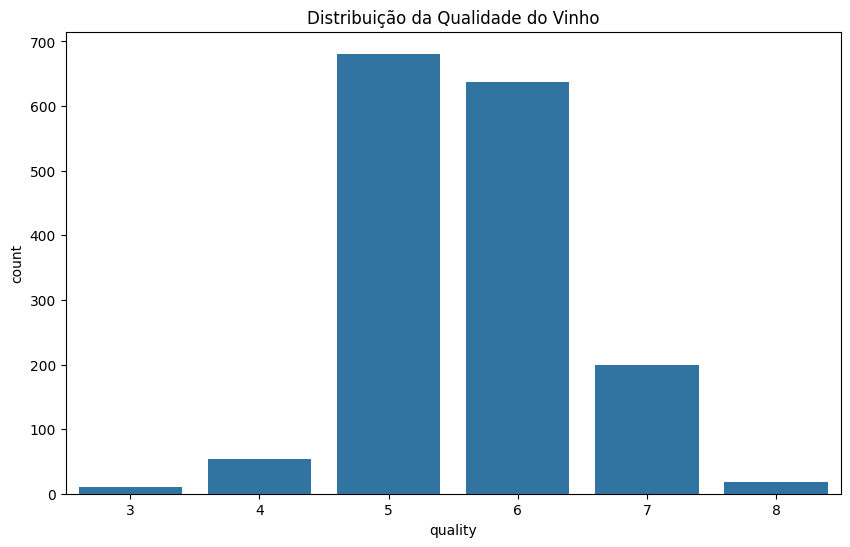

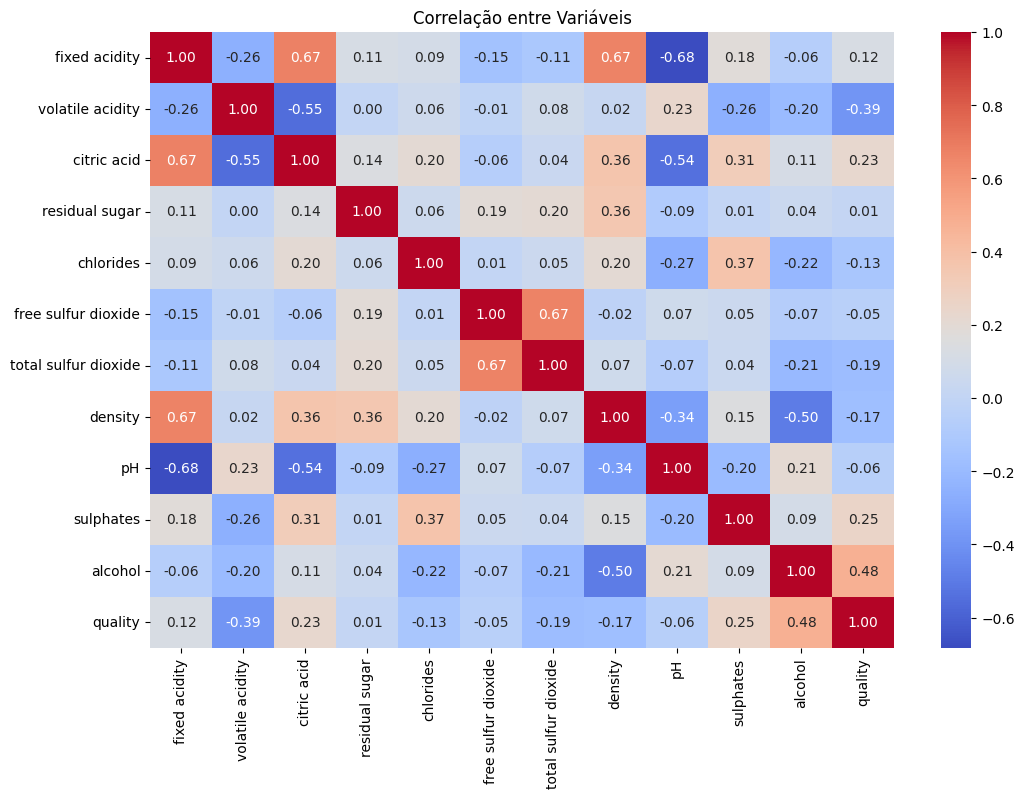

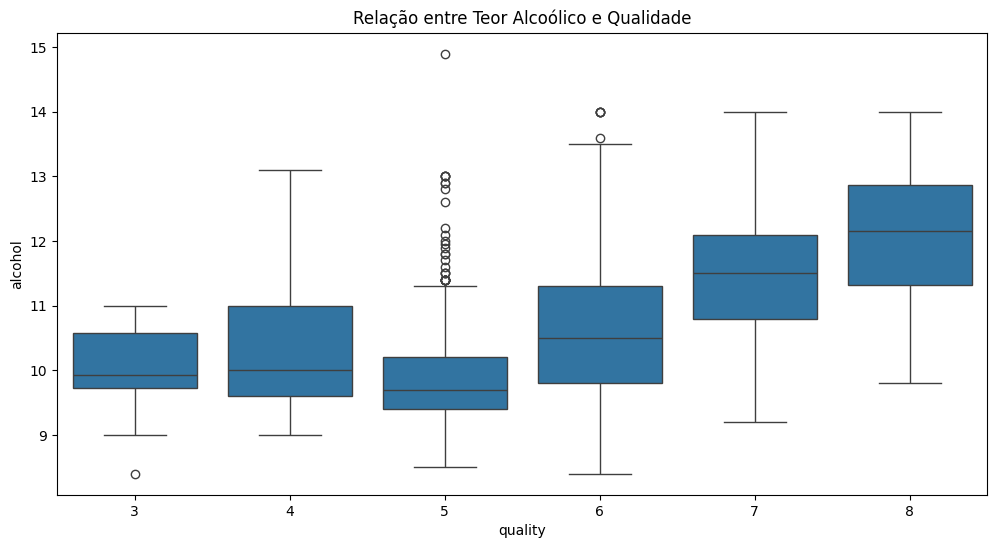


=== REGRESSÃO LINEAR ===
RMSE: 0.6413
R2: 0.3514

=== RIDGE REGRESSION ===
RMSE: 0.6413
R2: 0.3514

=== RANDOM FOREST ===
RMSE: 0.5909
R2: 0.4493


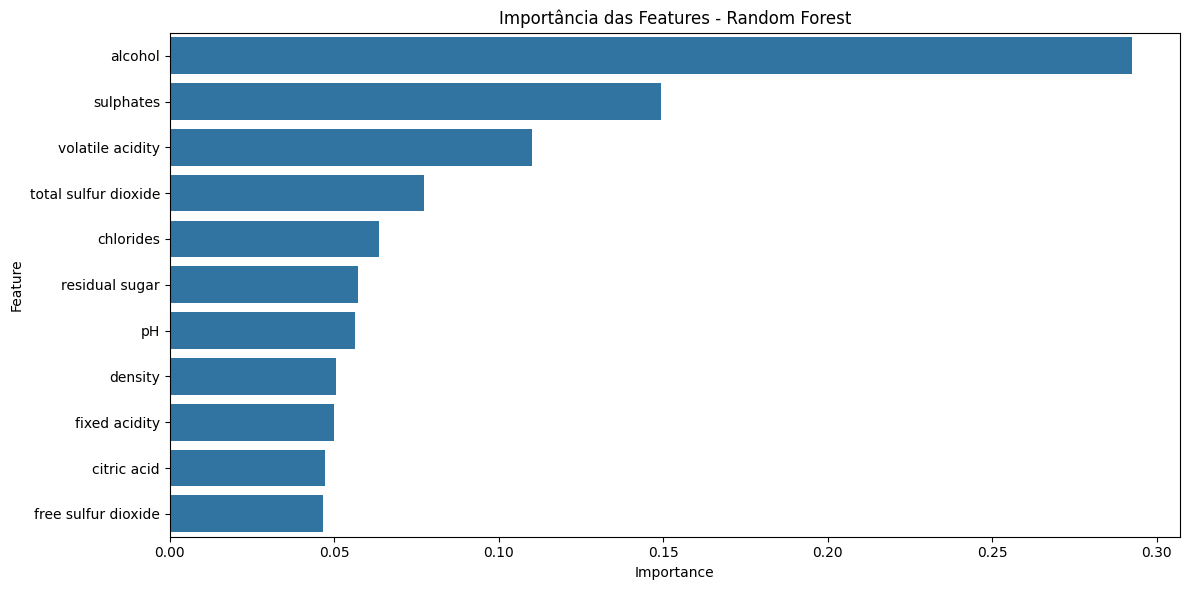


=== REDUÇÃO DE DIMENSIONALIDADE COM PCA ===
RMSE com PCA: 0.6039
RMSE sem PCA: 0.5909


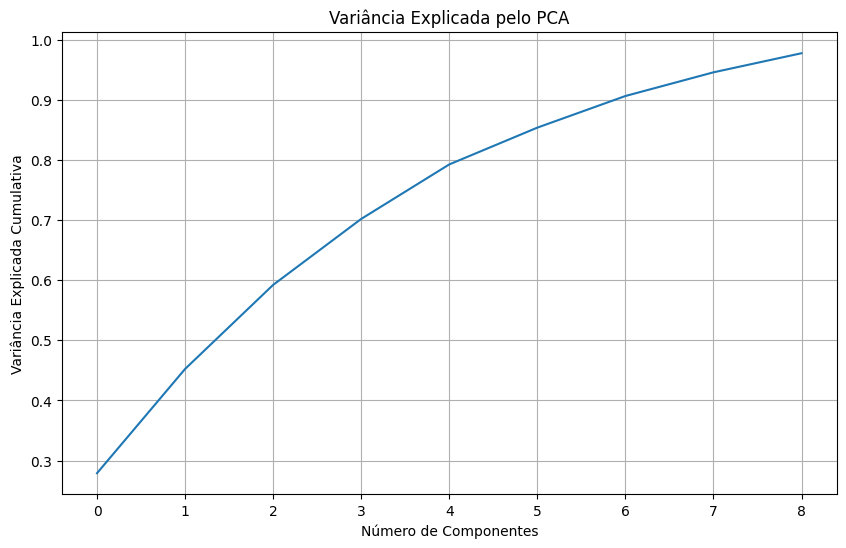

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

file_id = '144H80ibPsgeDdUOW8ufIHMJD0Rvhx8W2'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, sep=';')

# Verificar dados e mmissing values
print("\nPrimeiras linhas do dataset corrigido:")
print(df.head())

print("\nInformações do dataset:")
print(df.info())

print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# ANÁLISE EXPLORATÓRIA
# Distribuição da qualidade
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=df)
plt.title('Distribuição da Qualidade do Vinho')
plt.show()
#matriz de correação
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis')
plt.show()

# Relação entre álcool e qualidade
plt.figure(figsize=(12,6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Relação entre Teor Alcoólico e Qualidade')
plt.show()

# Pre-processamento e modelagem
# Separar features e target
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para avaliar modelos corrigida
def evaluate_regressor(model, X_train, X_test, y_train, y_test):
    try:
        # Pipeline
        pipeline = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])

        # Treinar
        pipeline.fit(X_train, y_train)

        # Prever
        y_pred = pipeline.predict(X_test)

        # Métricas
        metrics = {
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'r2': r2_score(y_test, y_pred),
            'model': pipeline
        }

        # Feature importance para modelos que possuem
        if hasattr(model, 'feature_importances_'):
            features = X.columns
            importances = model.feature_importances_

            metrics['feature_importance'] = pd.DataFrame({
                'Feature': features,
                'Importance': importances
            }).sort_values('Importance', ascending=False)

        return metrics

    except Exception as e:
        print(f"Erro ao avaliar modelo: {str(e)}")
        return None

# Avaliação
print("\n=== REGRESSÃO LINEAR ===")
lr = evaluate_regressor(LinearRegression(), X_train, X_test, y_train, y_test)
if lr:
    print(f"RMSE: {lr['rmse']:.4f}")
    print(f"R2: {lr['r2']:.4f}")

print("\n=== RIDGE REGRESSION ===")
ridge = evaluate_regressor(Ridge(alpha=1.0), X_train, X_test, y_train, y_test)
if ridge:
    print(f"RMSE: {ridge['rmse']:.4f}")
    print(f"R2: {ridge['r2']:.4f}")

print("\n=== RANDOM FOREST ===")
rf = evaluate_regressor(RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)
if rf:
    print(f"RMSE: {rf['rmse']:.4f}")
    print(f"R2: {rf['r2']:.4f}")

    # Mostrar importância das features
    if 'feature_importance' in rf:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Importance', y='Feature',
                    data=rf['feature_importance'])
        plt.title('Importância das Features - Random Forest')
        plt.tight_layout()
        plt.show()

# 5. PCA (OPCIONAL)
print("\n=== REDUÇÃO DE DIMENSIONALIDADE COM PCA ===")
if rf:
    # Pipeline com PCA
    pca_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),  # Mantém 95% da variância
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    pca_pipeline.fit(X_train, y_train)
    y_pred_pca = pca_pipeline.predict(X_test)

    print(f"RMSE com PCA: {np.sqrt(mean_squared_error(y_test, y_pred_pca)):.4f}")
    print(f"RMSE sem PCA: {rf['rmse']:.4f}")

    # Visualizar variância explicada
    pca = pca_pipeline.named_steps['pca']
    plt.figure(figsize=(10,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Número de Componentes')
    plt.ylabel('Variância Explicada Cumulativa')
    plt.title('Variância Explicada pelo PCA')
    plt.grid()
    plt.show()

# Conclusões

* O modelo de **Random Forest Regressor apresentou melhor desempenho geral**, com menor RMSE e maior R², além de oferecer insights úteis com a análise de importância de atributos.
* A **álcool foi uma das variáveis mais relevantes**, o que está de acordo com os dados exploratórios.
* A **aplicação do PCA** reduziu a dimensionalidade mantendo um bom desempenho, o que pode ser útil para tornar o modelo mais leve e generalizável.